In [2]:
import datasets
from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')

df = dataset['train'].to_pandas()

# Skills Analysis

6. Top 10 most in-demand skills

In [3]:
import ast 
import pandas as pd
df['job_skills'] = df['job_skills'].apply(
    lambda x: ast.literal_eval(x) if pd.notna(x) else x)

df_exploded = df.explode('job_skills').value_counts('job_skills').head(10)
df_exploded = df_exploded.reset_index(name='skill_count')
df_exploded[['job_skills','skill_count']]



,job_skills,skill_count
0,sql,384849
1,python,380909
2,aws,145381
3,azure,132527
4,r,130892
5,tableau,127213
6,excel,127018
7,spark,114609
8,power bi,98147
9,java,85612


7. Compare Python vs Excel jobs

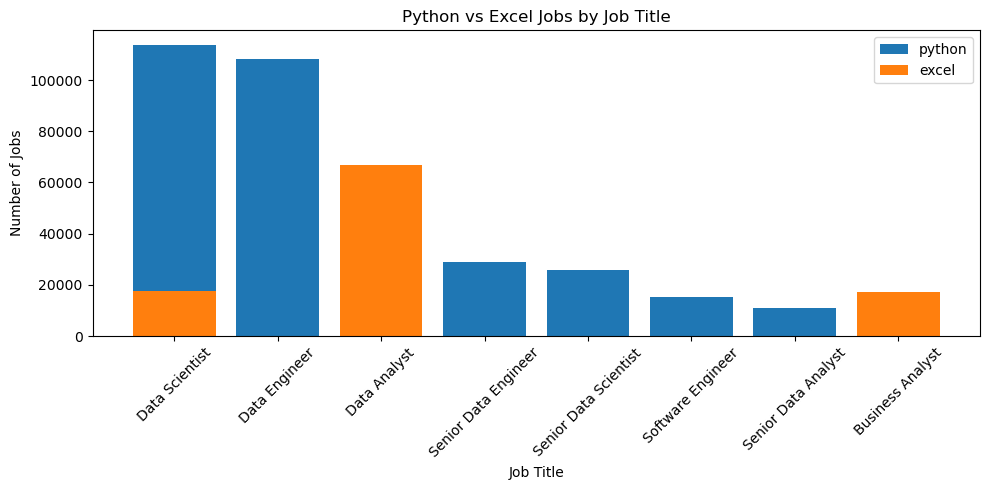

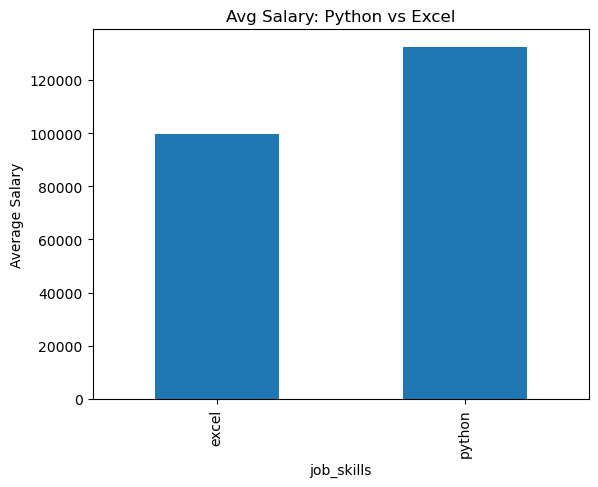

In [4]:
import matplotlib.pyplot as plt

df_exploded = df.explode('job_skills')

python_excel = df_exploded[df_exploded['job_skills'].isin(['python', 'excel'])]
python_excel['job_skills'].value_counts()

python_excel = (python_excel.groupby(['job_skills','job_title_short'])
           .size()
           .reset_index(name='salary')
           .sort_values(by = 'salary',ascending=False)
           .head(10)
)
python_excel

salary_compare =(df_exploded[df_exploded['job_skills'].isin(['python','excel'])]
                    .groupby('job_skills')['salary_year_avg'].mean().astype(int))

plt.figure(figsize=(10,5))

for skill in python_excel['job_skills'].unique():
    data = python_excel[python_excel['job_skills'] == skill]
    plt.bar(data['job_title_short'],data['salary'] , label=skill)

plt.xlabel('Job Title')
plt.ylabel('Number of Jobs')
plt.title('Python vs Excel Jobs by Job Title')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

salary_compare.plot(kind='bar', title='Avg Salary: Python vs Excel')
plt.ylabel('Average Salary')
plt.show()







8. Top skills for Data Analysts

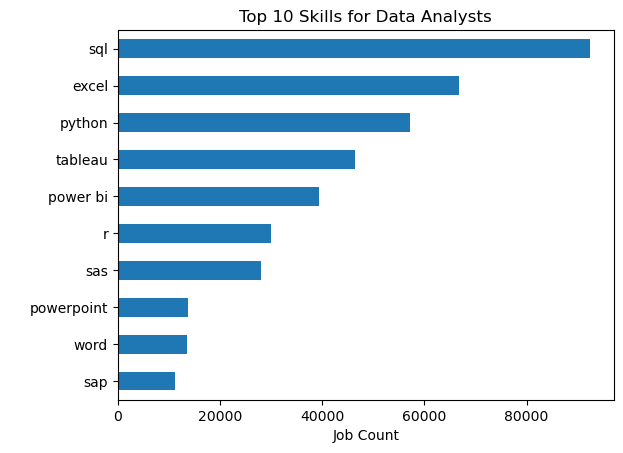

In [5]:
data_analysts = df[df['job_title_short'] == 'Data Analyst']

df_exploded = data_analysts.explode('job_skills')

top_skills = df_exploded['job_skills'].value_counts().head(10)

top_skills
top_skills.plot(kind='barh', title='Top 10 Skills for Data Analysts')
plt.xlabel('Job Count')
plt.ylabel(' ')
plt.legend().remove()
plt.gca().invert_yaxis()
plt.show()



9. Job titles that need SQL most

C:\Users\admin\AppData\Local\Temp\ipykernel_984\1966789445.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sql, x='sql_count', y='job_title_short', palette='dark:b')


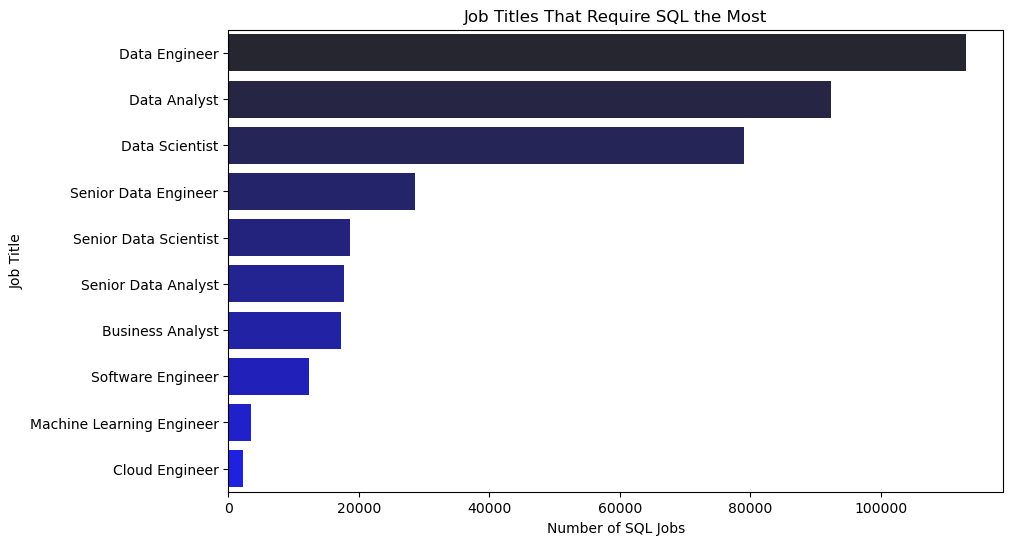

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

df_exploded = df.explode('job_skills')
df_sql = df_exploded[df_exploded['job_skills'] == 'sql']
df_sql = df_sql.groupby('job_title_short').size().reset_index(name='sql_count').sort_values(by = 'sql_count',ascending=False)
df_sql 


plt.figure(figsize=(10,6))
sns.barplot(data=df_sql, x='sql_count', y='job_title_short', palette='dark:b')


plt.title("Job Titles That Require SQL the Most")
plt.xlabel("Number of SQL Jobs")
plt.ylabel("Job Title")

plt.show()


10. Which skill appears in most remote jobs?

In [7]:
df_remote = df[df['job_work_from_home'] == True]
df_exploded = df_remote.explode('job_skills')
df_remote = df_exploded['job_skills'].value_counts().reset_index(name='count').sort_values(by='count',ascending=False).head(1)

df_remote[['job_skills','count']]

#I filtered only remote jobs, exploded the skills column into individual rows, 
# and used value_counts to find the most frequently required skill in remote jobs."

,job_skills,count
0,python,40492


11. Skill vs Salary correlation

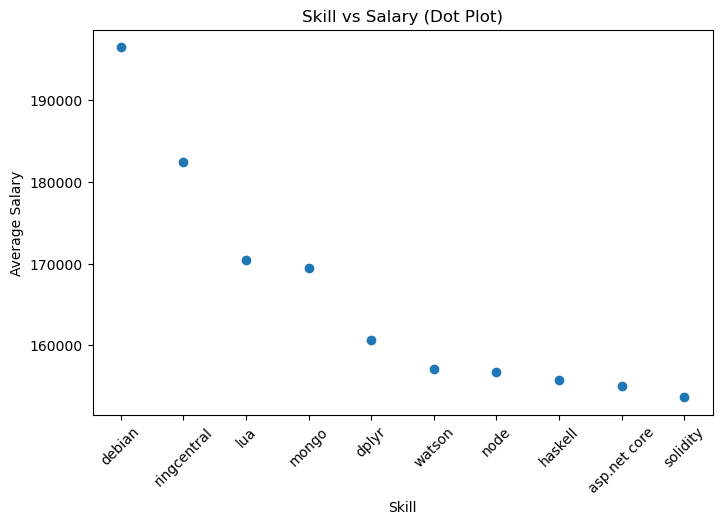

In [8]:
df_salary = df[df['salary_year_avg'].notna()]
df_explode =df_salary.explode('job_skills')
df_skills =(df_explode.groupby('job_skills')['salary_year_avg']
            .mean()
            .astype(int)
            .reset_index(name='avg_salary')
            .sort_values(by='avg_salary',ascending=False)
            .head(10)
)
df_skills
plt.figure(figsize=(8,5))
plt.scatter(df_skills['job_skills'], df_skills['avg_salary'])

plt.title('Skill vs Salary (Dot Plot)')
plt.xlabel('Skill')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.show()


12. Skills with least demand

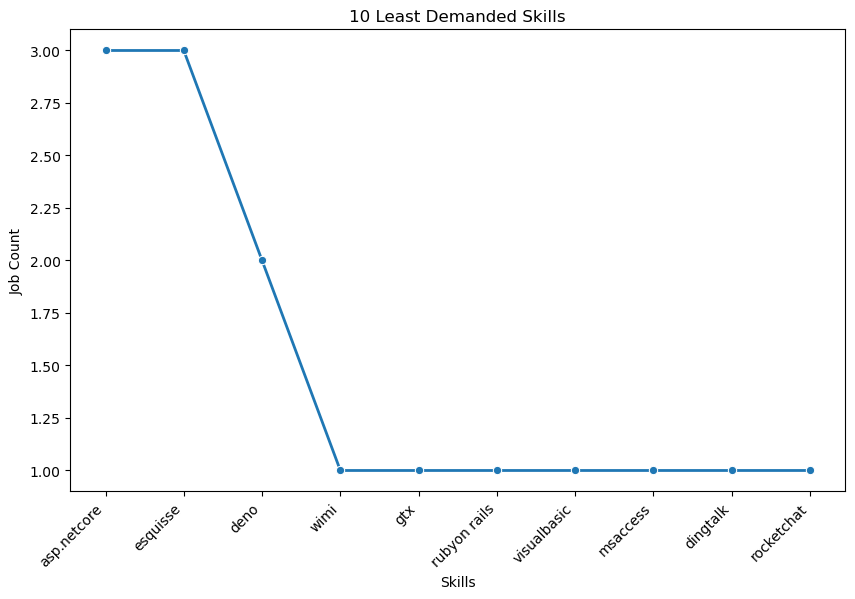

In [9]:
df_exploded = df.explode('job_skills')
least_demand = df_exploded['job_skills'].value_counts().reset_index(name='count').tail(10)
least_demand 

plt.figure(figsize=(10,6))
sns.lineplot(x='job_skills', y='count', data=least_demand, marker='o', linewidth=2)
plt.xticks(rotation=45, ha='right')
plt.title('10 Least Demanded Skills')
plt.xlabel('Skills')
plt.ylabel('Job Count')

plt.show()
